# Gender in Parnell's Speeches

## Research Question and Process

Women played a key role in the development of Irish nationalism and land agitation during the period of Parnell's political activity. To what extent is the role of women in these movements reflected in the speeches of Parnell?

Also demonstrating the different stages that go into the data modelling process and the use of some simple techniques to analyse data frequency.

## Tools

We will be using a Jupyter Notebook and the Python programming language.

Jupyter Notebooks have a number of key advantages, particularly for working with data:

- easily show code, outputs and explanatory text in one place
- run code one bit at a time, rather than running the whole programme at once
- pieces of code are run in cells and any outputs are shown underneath
- encourage an iterative approach

## Interactivity

All cells are alterable but some cells that are easy to work with interactively are highlighted during the notebook. These are highlighted with the phrase 'Alterable Cell' above them in blue and have instructions.

# Python Code

## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/parnell_files

First, we import libraries which go beyond the built-in Python capabilities.

In [111]:
#libraries for getting file paths and data extraction from files
import os
from natsort import os_sorted
from pathlib import Path
from bs4 import BeautifulSoup
#libraries for data analysis and manipulation
import re
import numpy as np
import collections
#libraries for linguistic manipulation
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
from nltk.corpus import stopwords
nltk.download('stopwords')
#library for graphs
import matplotlib.pyplot as plt

## Extracting Data from Files

The TEI XML files for the speech reports are kept together in a directory. Prior to the data extraction stage, we need to extract the path for each file into a list of file paths.

In [112]:
dir_path = Path('sources/')

#get filepaths to all the XML files in the directory
xml_files = (file for file in dir_path.iterdir() if file.is_file() and file.name.lower().endswith('.xml'))

#sort xml file paths numerically using os_sorted library
xml_files = os_sorted(xml_files)

We then extract the filenames for all files, removing the ".xml" extension, these will be used for identification purposes below.

In [113]:
#basename returns filename removing directory path.
#split to remove ".xml" extension so that we can use later
filenames = []
for path in xml_files:
    filename = os.path.basename(path)
    filename = filename.split(".")[0]
    filenames.append(filename)

Extract the contents of each file and convert into a format that enables us to pull out the parts of the file that are of interest to us. For this purpose we use the Beautiful Soup library imported above.

In [114]:
#create an empty list
all_docs = []
#loop through each file path from list created above
for file in xml_files:
    #use each file path to open each file and convert into Beautiful Soup object, then append to all_docs list
    with file.open('r', encoding='utf-8') as xml:
        doc = BeautifulSoup(xml, "lxml-xml")
        all_docs.append(doc)

Below is an example of the contents of one of the TEI XML files converted into a Beautiful Soup object

In [115]:
print(all_docs[0])

<?xml version="1.0" encoding="utf-8"?>
<?xml-model href="http://www.tei-c.org/release/xml/tei/custom/schema/relaxng/tei_all.rng" type="application/xml" schematypens="http://relaxng.org/ns/structure/1.0"?><?xml-model href="http://www.tei-c.org/release/xml/tei/custom/schema/relaxng/tei_all.rng" type="application/xml"
	schematypens="http://purl.oclc.org/dsdl/schematron"?><TEI xmlns="http://www.tei-c.org/ns/1.0">
<teiHeader>
<fileDesc>
<titleStmt>
<!-- put file title here e.g.  Mr Parnell's Speech at Clara, The Times, Wednesday 23 February 1881-->
<title>The Home Rule League, Great Meeting in the Rotundo, The Nation, Saturday 18 July 1874</title>
</titleStmt>
<publicationStmt>
<publisher>Parnell's Speeches</publisher>
<pubPlace>Cambridge</pubPlace>
<availability status="restricted" xml:id="metadataRights">
<licence target="https://creativecommons.org/licenses/by-nc/4.0/">This metadata is licensed under a Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0).</licence>

## Data Extraction and Cleaning

Converting the files into Beautiful Soup objects enables us to extract parts of each file using TEI-XML tags. In the cell below, we find the "body" tag, which contains the letter text in each file and then perform some "data cleaning", before adding the "clean" texts to a list.

Data cleaning standardises things like spacing, removes punctuation, and makes all text lowercase. Since we will later be interested in finding the same words throughout the text, such operations will remove textual "noise", such as punctuation and upper-case letters, that could get in the way of this process.

For example, if we were to search all of our non-cleaned texts for "meeting", then it would not find instances like "Meeting,". By removing the upper-case letter and punctuation, we ensure that all instances of the word are found across the corpus. This is a clear example of changing or modelling data in order to obtain clearer results.

### Extracting Texts as Lists of Words

We begin by extracting our speech report texts and converting them into lists of words. We also extract the date for each report. These are then added to a dictionary with the filename for each report as the key and the relevant report date and list of words as the value. We will be able to use this for counting the frequency of certain gendered words across the corpus.

In [116]:
#create empty dictionary
doc_body_dict = {}
#loop through the lists of filenames and Beautiful Soup objects created above
for filename, doc in zip(filenames, all_docs):
    #extract date of report publication
    date = doc.find('date')['when']
    #extract body element from each file, this contains the speech report text
    body = doc.find('body')
    #extract the text from body element, then replace newlines, possessive apostrophes, hyphens with spaces
    text = body.get_text().replace('\n', ' ').replace("'s ", ' ').replace('-', ' ')
    #remove single quotation marks at word boundaries
    text = re.sub(r'\b\'|\'\b', '', text) 
    #remove the remaining punctuation apart from remaining single quotes, to keep abbreviations
    no_punc_text = re.sub('[^\w\s\']', '', text)
    #convert into lowercase
    lower_text = no_punc_text.lower()
    #remove any extra spacing
    sing_space_text = re.sub('\s\s+', ' ', lower_text).strip()
    #convert each text into a list of words
    sing_space_tokens = sing_space_text.split()
    #add the date and tokenized words to the dictionary created above with the key as filename
    doc_body_dict[filename] = date, sing_space_tokens

Below is an example of the contents of one of the speech reports, cleaned and converted into a tokenized list of words and accessed via its key in the dictionary created above. We will use this to count the frequency of gender-related words across the corpus in the next section.

In [117]:
doc_body_dict['parnell_source_00001'][1]

['the',
 'home',
 'rule',
 'league',
 'great',
 'meeting',
 'in',
 'the',
 'rotundo',
 'great',
 'speech',
 'of',
 'mr',
 'butt',
 'on',
 'saturday',
 'a',
 'meeting',
 'of',
 'the',
 'home',
 'rule',
 'league',
 'was',
 'held',
 'in',
 'the',
 'round',
 'room',
 'of',
 'the',
 'rotundo',
 'there',
 'was',
 'an',
 'immense',
 'attendance',
 'the',
 'platform',
 'the',
 'gallery',
 'for',
 'admission',
 'to',
 'which',
 'a',
 'charge',
 'was',
 'mad',
 'and',
 'body',
 'of',
 'the',
 'hall',
 'having',
 'been',
 'literally',
 'thronged',
 'with',
 'a',
 'most',
 'respectable',
 'and',
 'enthusiastic',
 'audience',
 'mr',
 'charles',
 'stewart',
 'parnell',
 'high',
 'sheriff',
 'of',
 'wicklow',
 'occupied',
 'the',
 'chair',
 'and',
 'amongst',
 'those',
 'on',
 'the',
 'platform',
 'were',
 'mr',
 'butt',
 'mp',
 'mr',
 'meldon',
 'mp',
 'mr',
 'a',
 'm',
 'sullivan',
 'mp',
 'mr',
 'fay',
 'mp',
 'dr',
 'oleary',
 'mp',
 'and',
 'the',
 'hon',
 'judge',
 'little',
 'all',
 'of',
 'wh

### Extracting Texts as Lists of Sentences

Our next stage is to extract our speech report texts and convert them into lists of sentences. We also extract the filename for each sentence and its date, so each sentence is stored with the relevant speech report data.

We will be able to use these for finding the sentence context of gendered words across the corpus.

In [118]:
#initialize nltk abbreviation words, these will be added to the sentence tokenizer
#they will prevent the tokenizer from reading some full stops as sentence-enders
punkt_param = PunktParameters()
#we can add our own abbreviation words, e.g. "hon." and "mr." frequently have full stops in the reports
punkt_param.abbrev_types = set(['hon', 'mr', 'rev', 'dr', 'm.p', 'c.s', 'c.v', 'c.e', 't.l', 'j.r', 'j.j', 'a.j',
                            'r.b', 'j.g', 'j.l', 'j.r', 'j.f', 'n.b', 'p.j', 'c.j', 't.d', 'r', 'p.p', 'l.p', 'c.c', 'wm',
                            'capt', 'messrs', 'patk', '1d', '2d', '3d', '4d', '5d', '6d', '7d', '8d', '9d', '10d', '11d',
                            '1/2d', '3/4d', 'prof', 'per cent', 'adm', '2s', '1,400,000/', '400,000/'])

#initialize nltk sentence detector for dividing text into sentences
sentence_tokenizer = PunktSentenceTokenizer(punkt_param)

In [119]:
#create empty list
doc_sentences_list = []
#loop through the lists of filenames and Beautiful Soup objects created above
for file, doc in zip(filenames, all_docs):
    #extract body element from each file, this contains the speech report text
    body = doc.find('body')
    #extract date of report publication
    date = doc.find('date')['when']
    #extract the text from body element, then replace newlines, possessive apostrophes, hyphens with spaces
    text = body.get_text().replace('\n', ' ').replace("'s ", ' ').replace('-', ' ')
    #remove single quotation marks at word boundaries
    text = re.sub(r'\b\'|\'\b', '', text) 
    #convert into lowercase
    lower_text = text.lower()
    #feed text through sentence tokenizer to divide into a list of sentences
    sentences = sentence_tokenizer.tokenize(lower_text)
    #remove punctuation from each sentence in the list
    no_punct_sentences = [re.sub('[^\w\s\']', '', sentence) for sentence in sentences]
    #remove any extra spacing from each sentence in the list
    sing_space_sentences = [re.sub('\s\s+', ' ', sentence).strip() for sentence in no_punct_sentences]
    #convert list of sentences for doc to list of filename, date, sentence tuples
    file_date_sentences = [(file, date, sentence) for sentence in sing_space_sentences]
    #append each list of sentence data tuples to the list created above
    doc_sentences_list.append(file_date_sentences)
#convert lists of sentence tuples into one list of sentence tuples for whole corpus
file_sentences_list = [sentence_tuple for sentence_list in doc_sentences_list for sentence_tuple in sentence_list]
file_sentences_list

[('parnell_source_00001',
  '1874-07-18',
  'the home rule league great meeting in the rotundo great speech of mr butt on saturday a meeting of the home rule league was held in the round room of the rotundo'),
 ('parnell_source_00001',
  '1874-07-18',
  'there was an immense attendance the platform the gallery for admission to which a charge was mad and body of the hall having been literally thronged with a most respectable and enthusiastic audience'),
 ('parnell_source_00001',
  '1874-07-18',
  'mr charles stewart parnell high sheriff of wicklow occupied the chair and amongst those on the platform were mr butt mp mr meldon mp mr a m sullivan mp mr fay mp dr oleary mp and the hon judge little all of whom were enthusiastically received'),
 ('parnell_source_00001',
  '1874-07-18',
  'the following report of the proceedings is taken somewhat abridged from the freeman at half past eight oclock on the motion of mr alfred webb the chair was taken amidst loud cheers by mr cs parnell the chair

Having converted the corpus into a list of sentence tuples, the final stage is to convert each sentence into a list of words. So we finish with a list of sentences with filename, date and sentence, with the sentence divided into a list of words. Below we will look for gendered words in the sentences and find the frequency of other words in the same sentences as these gendered words.

In [120]:
sentence_data_tokens = [(file, date, sentence.split()) for file, date, sentence in file_sentences_list]
sentence_data_tokens = [(file, date, sentence) for file, date, sentence in sentence_data_tokens if sentence != []]

Below we can see the first five sentences in the corpus, cleaned and converted into lists of words.

In [121]:
sentence_data_tokens[:5]

[('parnell_source_00001',
  '1874-07-18',
  ['the',
   'home',
   'rule',
   'league',
   'great',
   'meeting',
   'in',
   'the',
   'rotundo',
   'great',
   'speech',
   'of',
   'mr',
   'butt',
   'on',
   'saturday',
   'a',
   'meeting',
   'of',
   'the',
   'home',
   'rule',
   'league',
   'was',
   'held',
   'in',
   'the',
   'round',
   'room',
   'of',
   'the',
   'rotundo']),
 ('parnell_source_00001',
  '1874-07-18',
  ['there',
   'was',
   'an',
   'immense',
   'attendance',
   'the',
   'platform',
   'the',
   'gallery',
   'for',
   'admission',
   'to',
   'which',
   'a',
   'charge',
   'was',
   'mad',
   'and',
   'body',
   'of',
   'the',
   'hall',
   'having',
   'been',
   'literally',
   'thronged',
   'with',
   'a',
   'most',
   'respectable',
   'and',
   'enthusiastic',
   'audience']),
 ('parnell_source_00001',
  '1874-07-18',
  ['mr',
   'charles',
   'stewart',
   'parnell',
   'high',
   'sheriff',
   'of',
   'wicklow',
   'occupied',
   't

### Two Cleaned Datasets

So we finish our data cleaning process with our original XML-TEI data changed into two different datasets:

- The text of each speech report cleaned and divided into a list of words, with its filename and date.

- The whole dataset cleaned and divided into sentences, then each sentence changed into a list of words, stored with its filename and date.

These will be used for two different types of analysis below.

# Gendered Words Frequency and Context

"_In October 1881 the government dissolved the Irish National Land League, declaring it an unlawful organisation and arresting leaders at both local and national levels. It was then that the Ladies' Land League took control of the land movement and defiantly continued the land agitation. The Ladies' Land League had been formed in January 1881 under the leadership of Anna Parnell, sister of the Land League president, Charles Stewart Parnell. Its formation was in response to the impending passage of the Protection of Person and Property Act, which was intended to facilitate the arrest and imprisonment of leaders and members of the Land League._"

"_While it is true that peasant women protested against evictions as members of the Ladies' Land League, it must be emphasised that rural women had engaged in this type of protest before the creation of the Ladies' Land League. They did so by actually attempting to prevent evictions from taking place._"

Janet K. TeBrake

Women of varying backgrounds clearly played an important role in the development of the Home Rule movement and land agitation during Parnell's time. But is the ongoing presence of women within reformist movements in Ireland reflected in his speeches? Moreover, where women are mentioned what is the context and what does this tell us?

In this section we will be analysing the frequency of gendered words throughout the corpus and the frequency of other words in the sentences which contain gendered words. For these purposes, we will be using the tokenized lists of words and sentences that we created above using the speech reports.

### Gendered Words

We first create our two lists of male and female gendered words, these will be used for both word frequency analysis and sentence context frequency analysis. This is a clear example of us setting subjective, human parameters as the basis for computational analysis.

### <font color="blue">Alterable cell</font>

<font color="blue">You can change the contents of either of the lists in the cell to affect the frequency results displayed below. However, keep the format of the lists the same (e.g. male_list = ['item1', 'item2', 'item3'])</font>

In [122]:
male_list = ['irishman', 'irishmen', 'man', 'men', 'boy', 'boys', 'father', 'fathers', 
             'brother', 'brothers', 'son', 'sons', 'husband', 'husbands', 
             'gentleman', 'gentlemen', 'him', 'he', 'mr']
female_list = ['irishwoman', 'irishwomen', 'woman', 'women', 'girl', 'girls', 
               'mother', 'mothers', 'sister', 'sisters', 'daughter', 'daughters', 
               'wife', 'wives', 'lady', 'ladies', 'her', 'she', 'mrs']

### Frequency

We then use the gendered lists created above and count the number of appearances in the speech reports for each word in both lists. The frequency of these words will then be visualised with the help of the Matplotlib library imported above.

In [123]:
#use the collections library counter to count the frequency of each word across the whole corpus
corpus_count = collections.Counter([item for ls in doc_body_dict.values() for item in ls[1]])

#extract the frequency of each word in the female/male lists from the corpus_count object
#store in new gendered lists of tuples, with each tuple containing word and its frequency
male_count = [(item, corpus_count[item]) for item in male_list]
female_count = [(item, corpus_count[item]) for item in female_list]

In [124]:
#counts for male words across corpus
male_count

[('irishman', 131),
 ('irishmen', 262),
 ('man', 737),
 ('men', 898),
 ('boy', 12),
 ('boys', 13),
 ('father', 68),
 ('fathers', 8),
 ('brother', 18),
 ('brothers', 11),
 ('son', 9),
 ('sons', 24),
 ('husband', 9),
 ('husbands', 0),
 ('gentleman', 1324),
 ('gentlemen', 406),
 ('him', 1205),
 ('he', 6734),
 ('mr', 4092)]

In [125]:
#counts for female words across corpus
female_count

[('irishwoman', 1),
 ('irishwomen', 8),
 ('woman', 28),
 ('women', 39),
 ('girl', 2),
 ('girls', 2),
 ('mother', 4),
 ('mothers', 1),
 ('sister', 16),
 ('sisters', 5),
 ('daughter', 4),
 ('daughters', 0),
 ('wife', 15),
 ('wives', 16),
 ('lady', 4),
 ('ladies', 73),
 ('her', 546),
 ('she', 227),
 ('mrs', 9)]

We then use these lists of tuples to plot bar charts of the female and male word frequencies across the corpus.

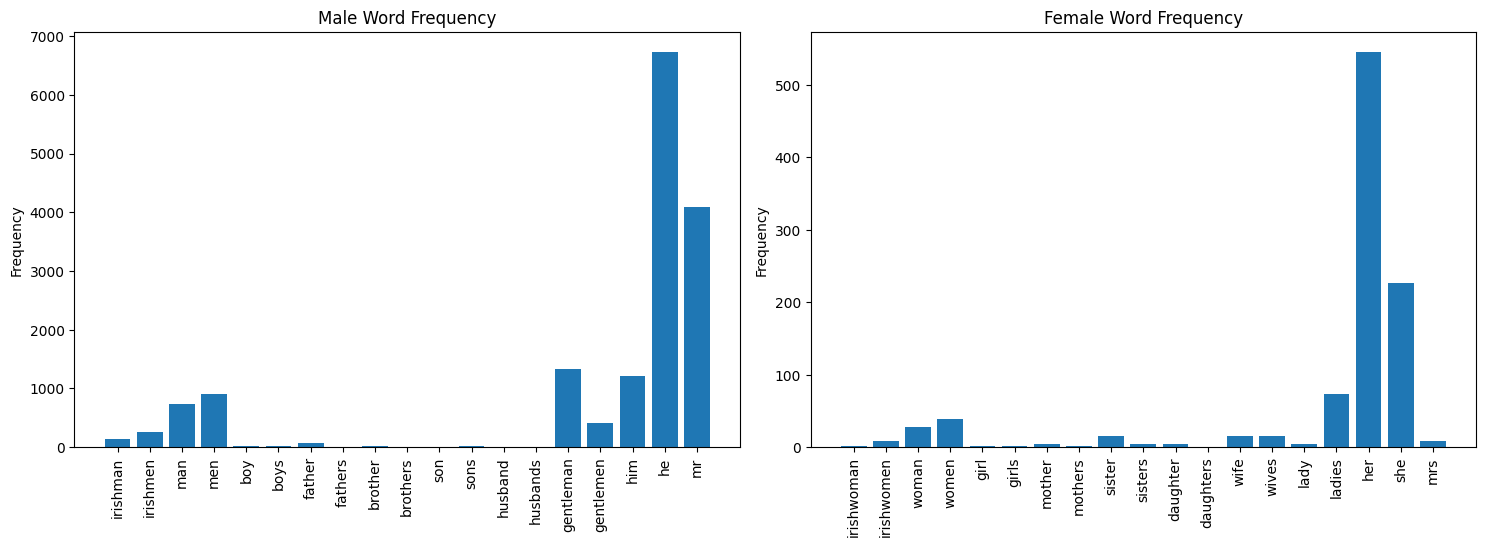

In [135]:
#divide female/male list of tuples created above into lists of words, frequency values using zip function
#these are used for x and y axes of chart
f_words, f_scores = zip(*female_count)
m_words, m_scores = zip(*male_count)

#x axes need a range of numbers, same length as number of words for initial plotting
f_x_pos = np.arange(len(f_words))
m_x_pos = np.arange(len(m_words))

#create figure with two plots for male and female charts
fig, (ax1, ax2) = plt.subplots(1,2)
#set figure size/layout parameters
fig.set_size_inches(15, 5)
fig.tight_layout(pad=2.0)

#plot x and y axes
ax1.bar(m_x_pos, m_scores)
#set the x axes labels and properties
ax1.set_xticks(m_x_pos, m_words, rotation=90)
#set y axis label
ax1.set_ylabel('Frequency')
#set plot title
ax1.set_title('Male Word Frequency')

#same process for female plotting
ax2.bar(f_x_pos, f_scores)
ax2.set_xticks(f_x_pos, f_words, rotation=90)
ax2.set_ylabel('Frequency')
ax2.set_title('Female Word Frequency')

plt.show()

### Gendered Words Sentence Context

In this section we use the list of sentences for the whole corpus prepared above and search this list with each of the words from our gendered lists. For each gendered word we find all of the sentences containing it and then look at the most frequent words found in those sentences.

By doing this we can look at the immediate context around different gendered words to see if we can find significant differences in their associated words, particularly between equivalent words for different genders, e.g. "women"/"men".

It is important to note that at the beginning of the section we remove stopwords from the sentences. Stopwords are highly frequent words such as "and" or "the", which are so common that they are likely to interfere with a co-occurrence analysis. We are therefore adding another layer of modelling between the initial input text and our final results.

In [127]:
#import stopwords list, we can then add our own stopwords to this list
#stopwords are common words we can omit from our corpus if they are not useful for analysis
stop_words = stopwords.words('english')
stop_words.extend(['every', 'would', 'cheers', 'hisses', 'applause', 'could', 'upon', 'may', 'go',
                   'said', 'say', 'know', 'far', 'come', 'put', 'us'])

The cell below finds all of the sentences containing each of our male words. It then counts the words found within the same sentences as each word and stores these values for later use.

In [128]:
#create an empty dictionary for each gendered word and its sentences
male_word_sentences = {}
#loop through the words in the male gendered list
for word in male_list:
    #create empty list for the sentences for each word
    sentences = []
    #loop through each sentence in the sentences list for whole corpus
    for file, date, sentence in sentence_data_tokens:
        #if the gendered word is in the sentence append the sentence to sentences list
        if word in sentence:
            sentences.append(sentence)
    #once all of the sentences have been checked for a word
    #add that word and its sentences to the dictionary set up above as key/value pair
    male_word_sentences[word] = sentences

#set up empty dictionary for counting sentence words for each gendered word    
male_word_count = {}
#loop through each gendered word and its sentences
for key, values in male_word_sentences.items():
    #initialise the counter from collections library
    count = collections.Counter()
    #loop through each word in each sentence
    for value in values:
        for item in value:
            #check if word is not the gendered word and not in our stopwords list
            #if this is the case add 1 to the count for that word in the counter
            if item != key and item not in stop_words:
                count[item] += 1
    #we finish with a counter dictionary with counts for all sentence words for gendered word
    #this is then sorted by highest value and converted to a list of tuples
    count = sorted(count.items(), key=lambda item: item[1], reverse=True)
    #take the top 15 values for the gendered word and add word/values to main count dictionary
    male_word_count[key] = count[:15]
#counts for the different male words can be seen below
male_word_count

{'irishman': [('years', 30),
  ('country', 26),
  ('great', 26),
  ('man', 25),
  ('ireland', 23),
  ('irish', 21),
  ('fact', 21),
  ('sentenced', 19),
  ('servitude', 17),
  ('single', 16),
  ('penal', 16),
  ('one', 15),
  ('judge', 15),
  ('mr', 14),
  ('much', 14)],
 'irishmen': [('ireland', 120),
  ('irish', 77),
  ('great', 68),
  ('country', 57),
  ('people', 49),
  ('time', 46),
  ('english', 42),
  ('one', 36),
  ('many', 35),
  ('hear', 33),
  ('men', 31),
  ('true', 31),
  ('trust', 31),
  ('government', 30),
  ('right', 29)],
 'man': [('ireland', 181),
  ('mr', 174),
  ('hear', 117),
  ('right', 115),
  ('one', 113),
  ('irish', 94),
  ('great', 88),
  ('country', 78),
  ('years', 62),
  ('hon', 61),
  ('gentleman', 61),
  ('people', 60),
  ('never', 49),
  ('land', 48),
  ('shall', 46)],
 'men': [('ireland', 272),
  ('irish', 179),
  ('hear', 164),
  ('mr', 149),
  ('country', 137),
  ('one', 98),
  ('many', 96),
  ('day', 93),
  ('land', 87),
  ('great', 86),
  ('people'

This cell follows the same procedure for counting words co-occurring in sentences with our female words.

In [129]:
female_word_sentences = {}
for word in female_list:
    sentences = []
    for file, date, sentence in sentence_data_tokens:
        if word in sentence:
            sentences.append(sentence)
    female_word_sentences[word] = sentences
    
female_word_count = {}   
for key, values in female_word_sentences.items():
    count = collections.Counter()
    for value in values:
        for item in value:
            if item != key and item not in stop_words:
                count[item] += 1
    count = sorted(count.items(), key=lambda item: item[1], reverse=True)
    female_word_count[key] = count[:15]
female_word_count

{'irishwoman': [('mrs', 1),
  ('obrien', 1),
  ('venture', 1),
  ('prophesy', 1),
  ('done', 1),
  ('great', 1),
  ('service', 1),
  ('national', 1),
  ('movement', 1),
  ('becoming', 1)],
 'irishwomen': [('irishmen', 8),
  ('ireland', 7),
  ('country', 6),
  ('irishman', 5),
  ('shall', 4),
  ('speaking', 4),
  ('way', 3),
  ('assembly', 3),
  ('man', 3),
  ('day', 3),
  ('america', 3),
  ('many', 3),
  ('born', 3),
  ('attempt', 2),
  ('reply', 2)],
 'woman': [('man', 16),
  ('ireland', 13),
  ('child', 8),
  ('irish', 8),
  ('way', 7),
  ('employment', 6),
  ('england', 5),
  ('husband', 4),
  ('government', 4),
  ('work', 4),
  ('land', 4),
  ('practical', 4),
  ('like', 3),
  ('australia', 3),
  ('little', 3)],
 'women': [('ireland', 19),
  ('men', 14),
  ('country', 14),
  ('irish', 13),
  ('children', 10),
  ('people', 10),
  ('poor', 10),
  ('government', 10),
  ('day', 9),
  ('connemara', 8),
  ('police', 7),
  ('troops', 7),
  ('hear', 7),
  ('part', 6),
  ('whether', 6)],
 '

### <font color='blue'>Alterable cell</font>

<font color='blue'>We can then select words from the above dictionary for plotting as bar chart and use the lists of tuples attached to those words for plotting. The values in the cell can be altered by using other words from our lists of gendered words to get new visualisations. Try giving new values to fem_wd and male_wd.</font>

If we look at the words frequently co-occuring with "ladies"/"gentlemen", it is clear that they appear very frequently together, particularly for the word "ladies". This is because the word "ladies" almost always occurs in the phrase "ladies and gentlemen", within Parnell's speeches.

In [130]:
#decide on words for plotting
fem_wd = 'ladies'
male_wd = 'gentlemen'

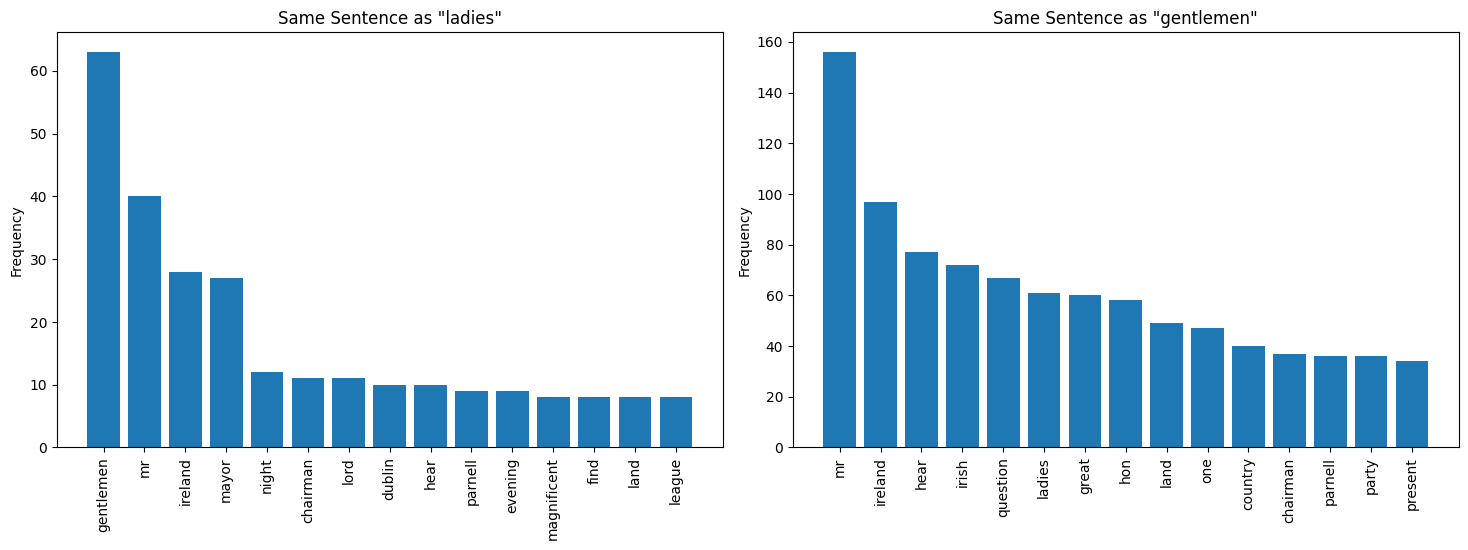

In [131]:
#divide female/male list of tuples created above into lists of words, frequency values using zip function
#these are used for x and y axes of chart
f_words, f_scores  = zip(*female_word_count[fem_wd])
m_words, m_scores  = zip(*male_word_count[male_wd])

#x axes need a range of numbers, same length as number of words for initial plotting
f_x_pos = np.arange(len(f_words))
m_x_pos = np.arange(len(m_words))

#create figure with two plots for male and female charts
fig, (ax1, ax2) = plt.subplots(1,2)
#set figure size/layout parameters
fig.set_size_inches(15, 5)
fig.tight_layout(pad=2.0)

#plot x and y axes
ax1.bar(f_words, f_scores)
#set the x axes labels and properties
ax1.set_xticks(f_x_pos, f_words, rotation=90)
#set y axis label
ax1.set_ylabel('Frequency')
#set plot title
ax1.set_title(f'Same Sentence as "{fem_wd}"')

#same process as for female plotting
ax2.bar(m_words, m_scores)
ax2.set_xticks(m_x_pos, m_words, rotation=90)
ax2.set_ylabel('Frequency')
ax2.set_title(f'Same Sentence as "{male_wd}"')

plt.show()

### <font color="blue">Alterable Cell</font>

We can then use information gained from looking at the co-occurrence of words with one of our keywords to go back and look at our corpus again in a more detailed way.

The word 'league' is conspicuous in its absence from the words most frequently co-occurring with 'ladies'. Reflecting an absence of direct discussion of the Ladies' Land League in the Parnell speech reports. We can use the code below to search for sentences where 'ladies' and 'league' do occur. Five instances are found across the whole dataset.

<font color="blue">The words in the 'keywords' list can be altered if you would like to search for instances of the co-occurrence of other words in sentences across the dataaset.</font>

In [132]:
#set keywords to limit dataset
keywords = ['ladies', 'league']

#loop through each list of sentence words and corresponding data
for file, date, sentence in sentence_data_tokens:
    #if keywords are present in sentence tokens print filename, date and sentence
    if set(keywords).issubset(sentence):
        print(file)
        print(date)
        print(sentence)
        print('\n')

parnell_source_00324
1885-11-23
['at', 'one', 'time', 'a', 'hundred', 'cells', 'had', 'been', 'prepared', 'in', 'a', 'prison', 'in', 'dublin', 'for', 'the', 'reception', 'of', 'the', 'ladies', 'of', 'ireland', 'shame', 'who', 'were', 'carrying', 'on', 'the', 'work', 'the', 'national', 'work', 'of', 'the', 'land', 'league', 'during', 'the', 'imprisonment', 'of', 'the', 'men', 'a', 'voice']


parnell_source_00324
1885-11-23
['bravo', 'ladies', 'three', 'cheers', 'for', 'the', 'ladies', 'and', 'in', 'several', 'instances', 'they', 'did', 'not', 'hesitate', 'to', 'arrest', 'under', 'an', 'old', 'and', 'obsolete', 'act', 'of', 'parliament', 'ladies', 'of', 'the', 'land', 'league', 'who', 'were', 'sustaining', 'evicted', 'tenants', 'throughout', 'the', 'country', 'doing', 'in', 'fact', 'the', 'work', 'of', 'charity']


parnell_source_00359
1885-08-29
['there', 'have', 'been', 'restored', 'to', 'their', 'original', 'holdings', '49', 'families', 'after', 'they', 'had', 'been', 'supported', 'by

For our second sentence co-occurrence analysis we use the words, 'women' and 'men'. Just to reiterate, any words from the gendered lists established earlier in this notebook can be used here.

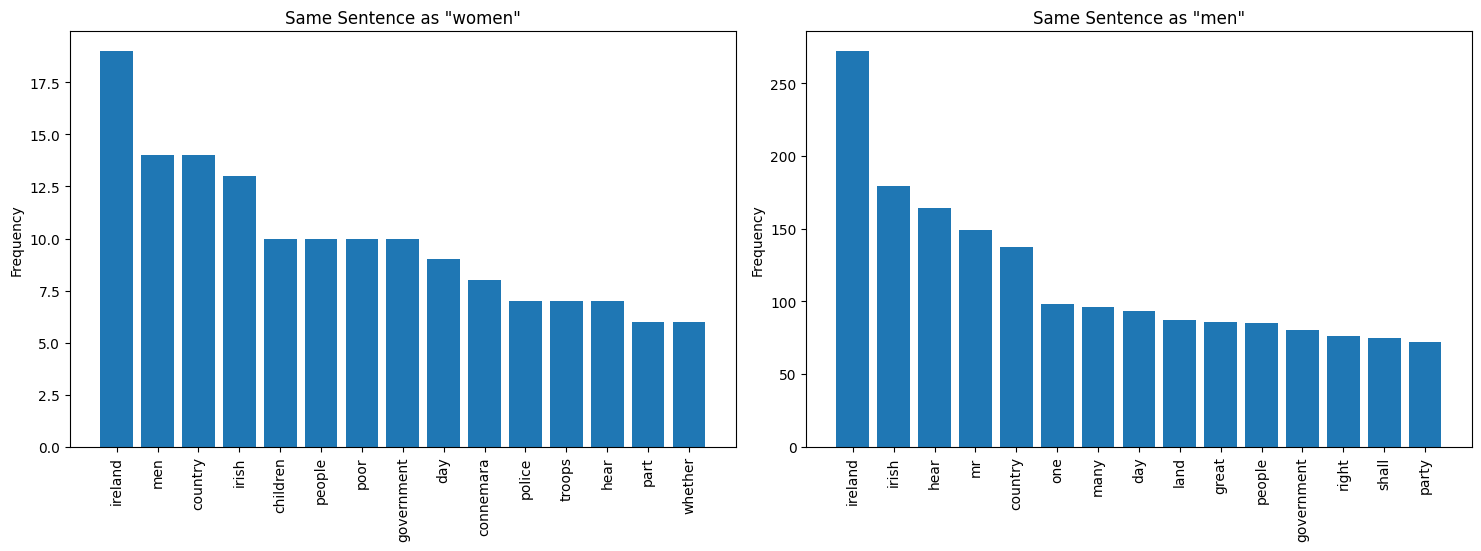

In [133]:
#decide on words for plotting
fem_wd = 'women'
male_wd = 'men'

#divide female/male list of tuples created above into lists of words, frequency values using zip function
#these are used for x and y axes of chart
f_words, f_scores  = zip(*female_word_count[fem_wd])
m_words, m_scores  = zip(*male_word_count[male_wd])

#x axes need a range of numbers, same length as number of words for initial plotting
f_x_pos = np.arange(len(f_words))
m_x_pos = np.arange(len(m_words))

#create figure with two plots for male and female charts
fig, (ax1, ax2) = plt.subplots(1,2)
#set figure size/layout parameters
fig.set_size_inches(15, 5)
fig.tight_layout(pad=2.0)

#plot x and y axes
ax1.bar(f_words, f_scores)
#set the x axes labels and properties
ax1.set_xticks(f_x_pos, f_words, rotation=90)
#set y axis label
ax1.set_ylabel('Frequency')
#set plot title
ax1.set_title(f'Same Sentence as "{fem_wd}"')

#same process as for female plotting
ax2.bar(m_words, m_scores)
ax2.set_xticks(m_x_pos, m_words, rotation=90)
ax2.set_ylabel('Frequency')
ax2.set_title(f'Same Sentence as "{male_wd}"')

plt.show()

Looking at the above visualisations for the words 'men' and 'women' we can see that, apart from the obvious large difference in frequency, there are contextual differences around the words. For instance, where it appears, the word 'women' is often associated with words such as 'connemara', 'police' and 'troops'. This kind of difference might lead us to return to a qualitative reading of the reports and look at specific instances of where the word 'women' has been used. 

Below, we limit our dataset to sentences in which the words 'connemara' and 'women' have both appeared, to get a clearer idea of why women are mentioned in this context.

In [134]:
#set keywords to limit dataset
keywords = ['women', 'connemara']

for file, date, sentence in sentence_data_tokens:
    #if keywords are present in sentence tokens print filename, date and sentence
    if set(keywords).issubset(sentence):
        print(file)
        print(date)
        print(sentence)
        print('\n')

parnell_source_00304
1880-02-21
['no', 'steps', 'had', 'been', 'taken', 'up', 'to', 'the', 'present', 'moment', 'by', 'the', 'government', 'of', 'which', 'he', 'was', 'the', 'responsible', 'head', 'to', 'relieve', 'the', 'distress', 'in', 'ireland', 'saving', 'to', 'send', 'troops', 'into', 'connemara', 'to', 'steal', 'from', 'the', 'poor', 'people', 'the', 'little', 'food', 'they', 'have', 'remaining', 'in', 'partial', 'satisfaction', 'of', 'the', 'exorbitant', 'claims', 'of', 'the', 'landlords', 'for', 'rent', 'and', 'the', 'hounding', 'on', 'of', 'these', 'troops', 'to', 'bayonet', 'the', 'unfortunate', 'women', 'and', 'children', 'of', 'connemara']


parnell_source_00304
1880-02-21
['several', 'of', 'its', 'members', 'have', 'had', 'their', 'hands', 'reeking', 'with', 'the', 'blood', 'of', 'those', 'poor', 'women', 'in', 'connemara', 'who', 'were', 'bayoneted', 'to', 'death', 'the', 'other', 'day']


parnell_source_00306
1880-02-21
['and', 'it', 'must', 'be', 'borne', 'in', 'mind',

"No steps had been taken up to the present moment by the Government of which he was the responsible head to relieve the distress in Ireland, saving to send troops into Connemara to steal from the poor people the little food they have remaining, in partial satisfaction of the exorbitant claims of the landlords for rent, and the hounding on of these troops to bayonet the unfortunate women and children of Connemara." The Cincinnati Enquirer, Saturday 21 February 1880

"the hands of others, including those of Attorney-General Gibson, the law adviser of the Castle, the Crown Prosecutor of Davitt and Brennan (hisses and applause), were reeking with the blood of the helpless women of Connemara who had been lately bayoneted by the troops of Queen Victoria, herself a woman." Chicago Daily Tribune, Tuesday 24 February 1880